# End to End ML Production Pipeline

### create folders + download 2 real datasets

In [3]:
from pathlib import Path
import pandas as pd

# ----------------------------
# Project paths
# ----------------------------
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_RAW = PROJECT_ROOT / "data" / "raw"
DATA_RAW.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATA_RAW     :", DATA_RAW)

# ----------------------------
# Download REAL datasets via OpenML
# - Classification: "credit-g" (binary classification)
# - Regression: "bike_sharing" (count regression)
# ----------------------------
def download_openml(dataset_name: str, out_csv: Path):
    from sklearn.datasets import fetch_openml

    ds = fetch_openml(name=dataset_name, as_frame=True)
    X = ds.data
    y = ds.target

    df = X.copy()
    df["target"] = y

    df.to_csv(out_csv, index=False)
    print(f"Saved: {out_csv.name} | shape={df.shape} | dataset={dataset_name}")
    return df

# Try OpenML (real datasets). If it fails (no internet), fall back to sklearn built-in datasets.
try:
    df_cls = download_openml("credit-g", DATA_RAW / "credit_g_classification.csv")
    df_reg = download_openml("bike_sharing", DATA_RAW / "bike_sharing_regression.csv")

except Exception as e:
    print("\nOpenML download failed (likely no internet). Falling back to sklearn built-in datasets.")
    print("Error:", repr(e))

    from sklearn.datasets import load_breast_cancer, fetch_california_housing

    # Classification fallback
    bc = load_breast_cancer(as_frame=True)
    df_cls = bc.frame.copy()
    df_cls.rename(columns={"target": "target"}, inplace=True)
    df_cls.to_csv(DATA_RAW / "breast_cancer_classification.csv", index=False)
    print(f"Saved fallback: breast_cancer_classification.csv | shape={df_cls.shape}")

    # Regression fallback
    cal = fetch_california_housing(as_frame=True)
    df_reg = cal.frame.copy()
    df_reg.rename(columns={"MedHouseVal": "target"}, inplace=True)
    df_reg.to_csv(DATA_RAW / "california_housing_regression.csv", index=False)
    print(f"Saved fallback: california_housing_regression.csv | shape={df_reg.shape}")

print("\nPreview (classification):")
display(df_cls.head())

print("\nPreview (regression):")
display(df_reg.head())

PROJECT_ROOT: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system
DATA_RAW     : /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/data/raw


/opt/anaconda3/lib/python3.12/site-packages/sklearn/datasets/_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


Saved: credit_g_classification.csv | shape=(1000, 21) | dataset=credit-g

OpenML download failed (likely no internet). Falling back to sklearn built-in datasets.
Error: OpenMLError('No active dataset bike_sharing found.')
Saved fallback: breast_cancer_classification.csv | shape=(569, 31)
Saved fallback: california_housing_regression.csv | shape=(20640, 9)

Preview (classification):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Preview (regression):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### A) Create these two files (run this as ONE notebook cell)

In [5]:
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
SRC = PROJECT_ROOT / "src"
SRC.mkdir(parents=True, exist_ok=True)

# 1) src/config.py
(SRC / "config.py").write_text(
'''from pathlib import Path

# Project root (assumes this file is in /src)
PROJECT_ROOT = Path(__file__).resolve().parents[1]

DATA_DIR = PROJECT_ROOT / "data"
RAW_DIR = DATA_DIR / "raw"
PROCESSED_DIR = DATA_DIR / "processed"

MODELS_DIR = PROJECT_ROOT / "models"
REPORTS_DIR = PROJECT_ROOT / "reports"

RANDOM_STATE = 42
''',
encoding="utf-8"
)

# 2) src/data_loader.py
(SRC / "data_loader.py").write_text(
'''from __future__ import annotations

from dataclasses import dataclass
from pathlib import Path
import pandas as pd


@dataclass
class DatasetSpec:
    name: str
    path: Path
    target_col: str = "target"


def load_csv(spec: DatasetSpec) -> pd.DataFrame:
    if not spec.path.exists():
        raise FileNotFoundError(f"Dataset not found: {spec.path}")

    df = pd.read_csv(spec.path)

    if spec.target_col not in df.columns:
        raise ValueError(f"Target column '{spec.target_col}' not found in columns: {list(df.columns)[:20]}...")

    if df.empty:
        raise ValueError(f"Dataset is empty: {spec.path}")

    return df


def basic_data_report(df: pd.DataFrame, target_col: str = "target") -> dict:
    report = {
        "n_rows": int(df.shape[0]),
        "n_cols": int(df.shape[1]),
        "missing_cells": int(df.isna().sum().sum()),
        "missing_by_col_top10": df.isna().sum().sort_values(ascending=False).head(10).to_dict(),
        "dtypes": df.dtypes.astype(str).to_dict(),
        "target_value_counts_top10": df[target_col].value_counts(dropna=False).head(10).to_dict(),
    }
    return report
''',
encoding="utf-8"
)

print("Created:", SRC / "config.py")
print("Created:", SRC / "data_loader.py")

Created: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/src/config.py
Created: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/src/data_loader.py


#### B) Load your datasets using these modules (run as ONE cell)

In [7]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(PROJECT_ROOT))  # so we can import src.*

from src.config import RAW_DIR
from src.data_loader import DatasetSpec, load_csv, basic_data_report

# --- Detect which dataset files exist (OpenML or fallback) ---
cls_candidates = [
    RAW_DIR / "credit_g_classification.csv",
    RAW_DIR / "breast_cancer_classification.csv",
]
reg_candidates = [
    RAW_DIR / "bike_sharing_regression.csv",
    RAW_DIR / "california_housing_regression.csv",
]

cls_path = next((p for p in cls_candidates if p.exists()), None)
reg_path = next((p for p in reg_candidates if p.exists()), None)

print("Classification CSV:", cls_path)
print("Regression CSV     :", reg_path)

df_cls = load_csv(DatasetSpec(name="classification", path=cls_path))
df_reg = load_csv(DatasetSpec(name="regression", path=reg_path))

print("\n Loaded classification:", df_cls.shape)
print("Loaded regression    :", df_reg.shape)

print("\n--- Basic Report (classification) ---")
print(basic_data_report(df_cls))

print("\n--- Basic Report (regression) ---")
print(basic_data_report(df_reg))

display(df_cls.head())
display(df_reg.head())

Classification CSV: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/data/raw/credit_g_classification.csv
Regression CSV     : /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/data/raw/california_housing_regression.csv

 Loaded classification: (1000, 21)
Loaded regression    : (20640, 9)

--- Basic Report (classification) ---
{'n_rows': 1000, 'n_cols': 21, 'missing_cells': 0, 'missing_by_col_top10': {'checking_status': 0, 'property_magnitude': 0, 'foreign_worker': 0, 'own_telephone': 0, 'num_dependents': 0, 'job': 0, 'existing_credits': 0, 'housing': 0, 'other_payment_plans': 0, 'age': 0}, 'dtypes': {'checking_status': 'object', 'duration': 'int64', 'credit_history': 'object', 'purpose': 'object', 'credit_amount': 'int64', 'savings_status': 'object', 'employment': 'object', 'installment_commitment': 'int64', 'personal_status': 'object', 'other_parties': 'object', 'residence_since': 'int64', 'property_magnitude': 'object', 'age

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## EDA (auto-save plots to reports/ + clean summary)

EDA_DIR: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/reports/eda
Professional plotting theme activated.

UNIQUE EDA PACK: classification | task=classification
Shape: (1000, 21)


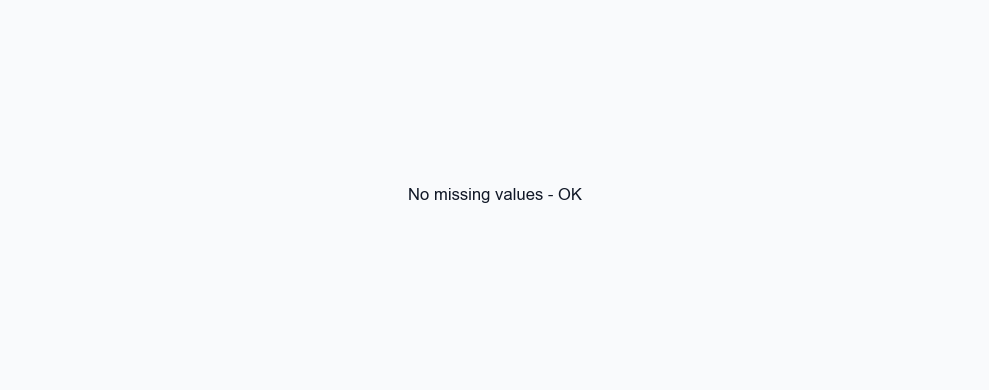

Saved: classification_01_missing_values_bar.png


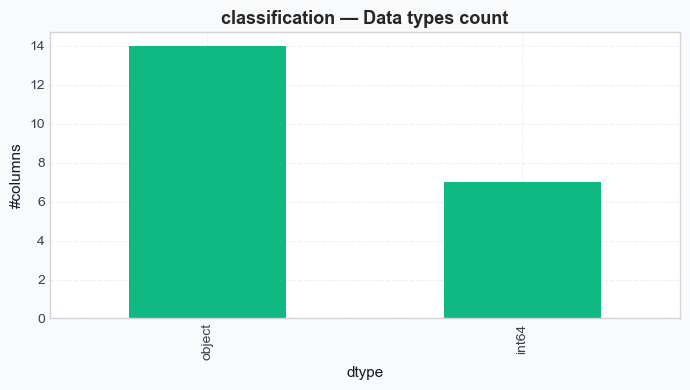

Saved: classification_02_dtype_counts.png


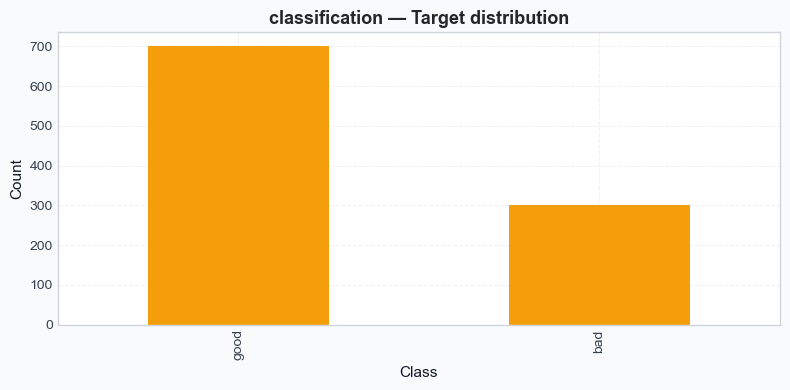

Saved: classification_03_target_distribution.png
Numeric cols: 7 | Categorical cols: 13


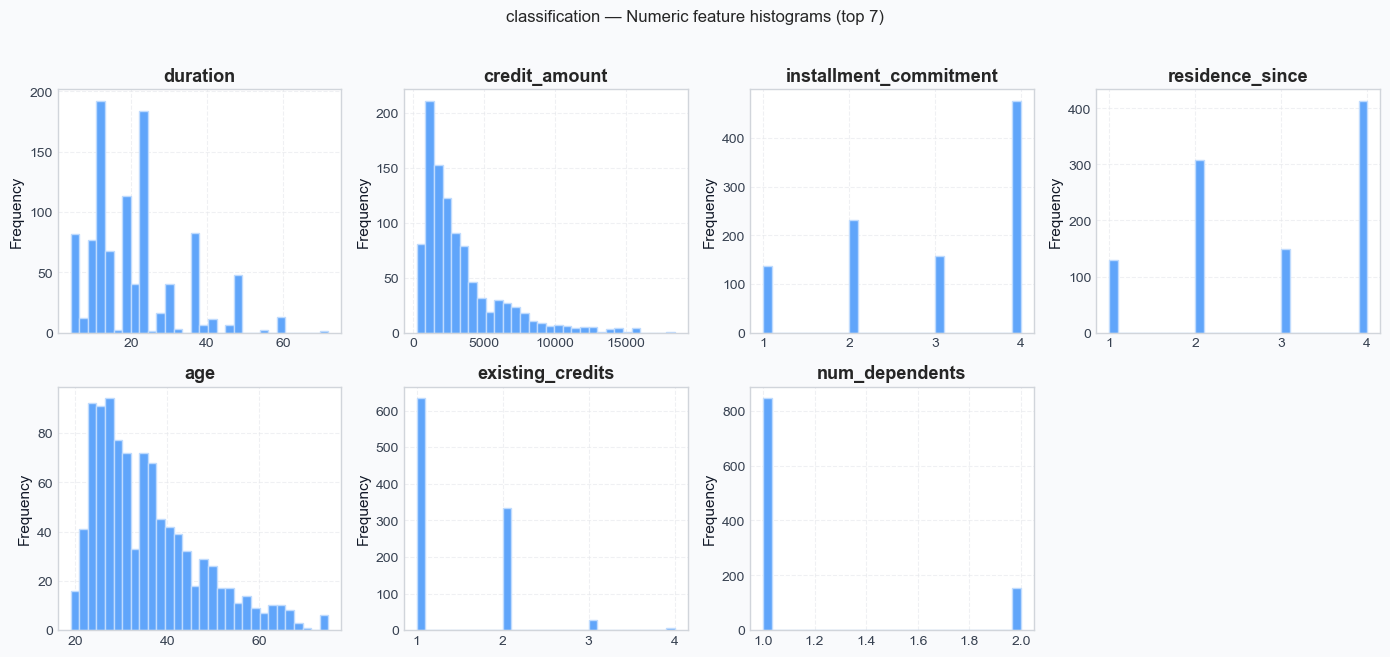

Saved: classification_04_numeric_hist_grid.png


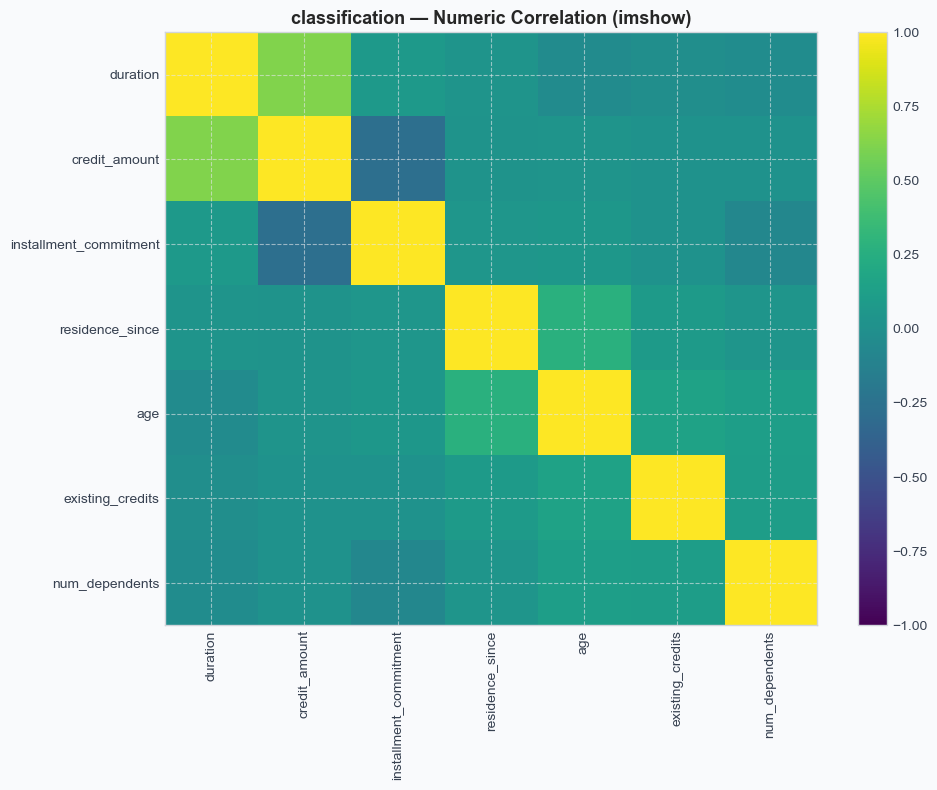

Saved: classification_05_numeric_correlation.png


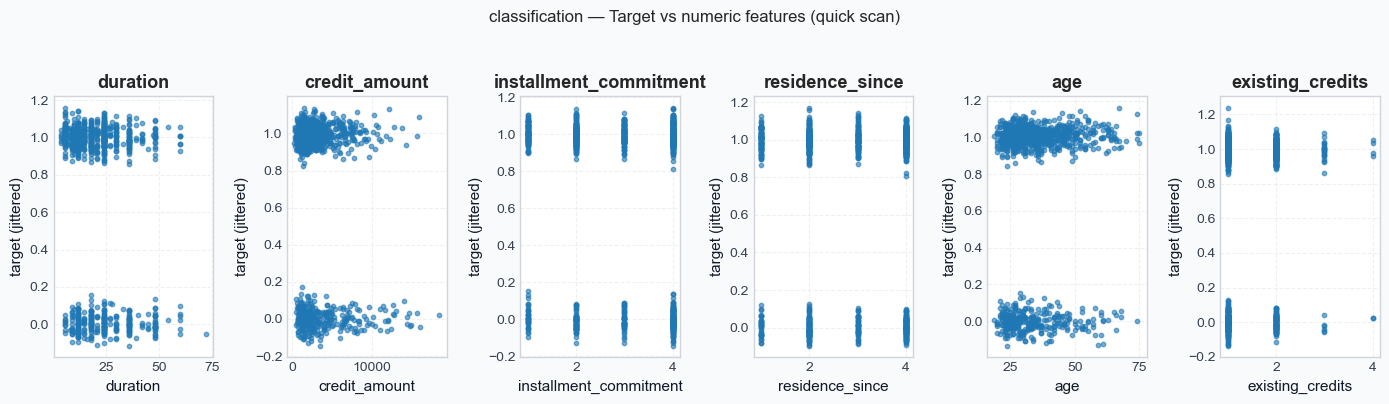

Saved: classification_06_target_vs_numeric_scatter_pack.png


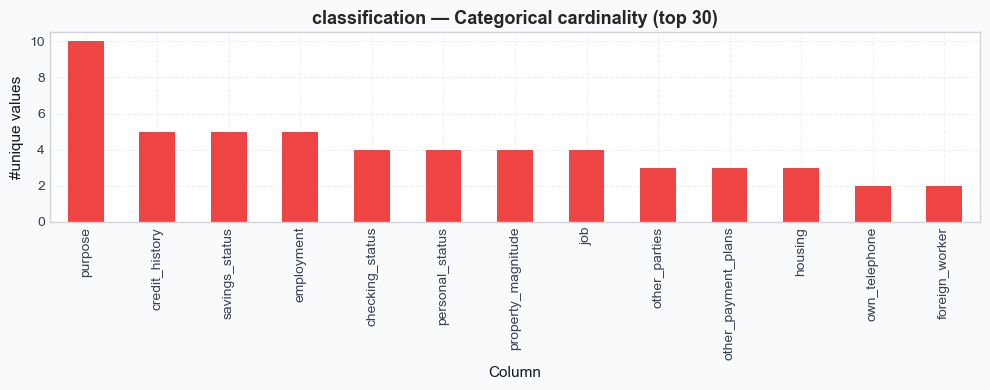

Saved: classification_07_categorical_cardinality.png


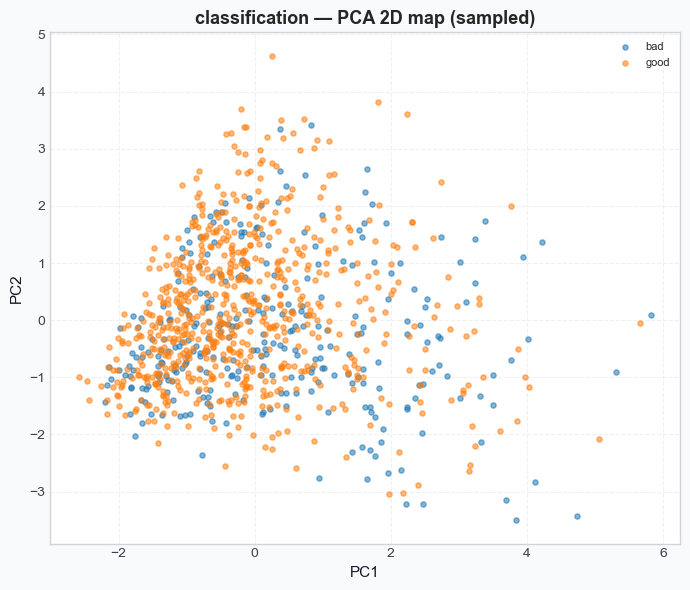

Saved: classification_08_pca_2d_map.png
Baseline explainability skipped due to: ValueError('y should be a 1d array, got an array of shape (250, 2) instead.')


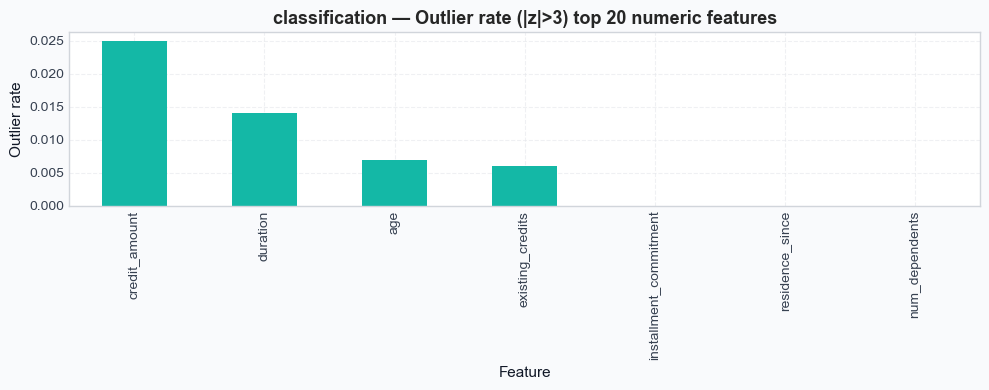

Saved: classification_10_outlier_rate.png
Unique EDA finished for classification. Plots saved in: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/reports/eda


UNIQUE EDA PACK: regression | task=regression
Shape: (20640, 9)


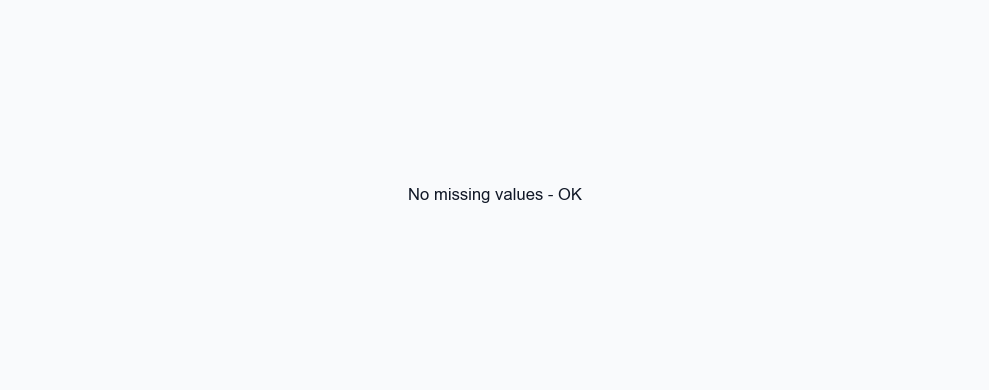

Saved: regression_01_missing_values_bar.png


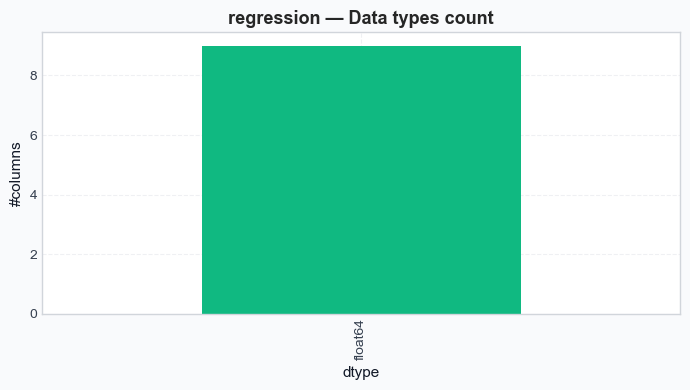

Saved: regression_02_dtype_counts.png


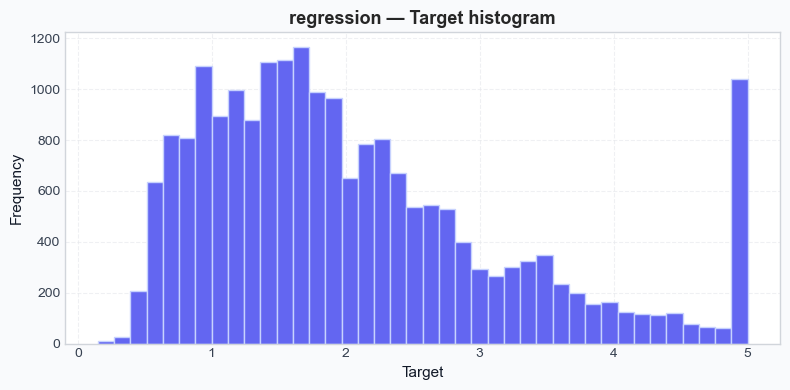

Saved: regression_03_target_histogram.png
Numeric cols: 8 | Categorical cols: 0


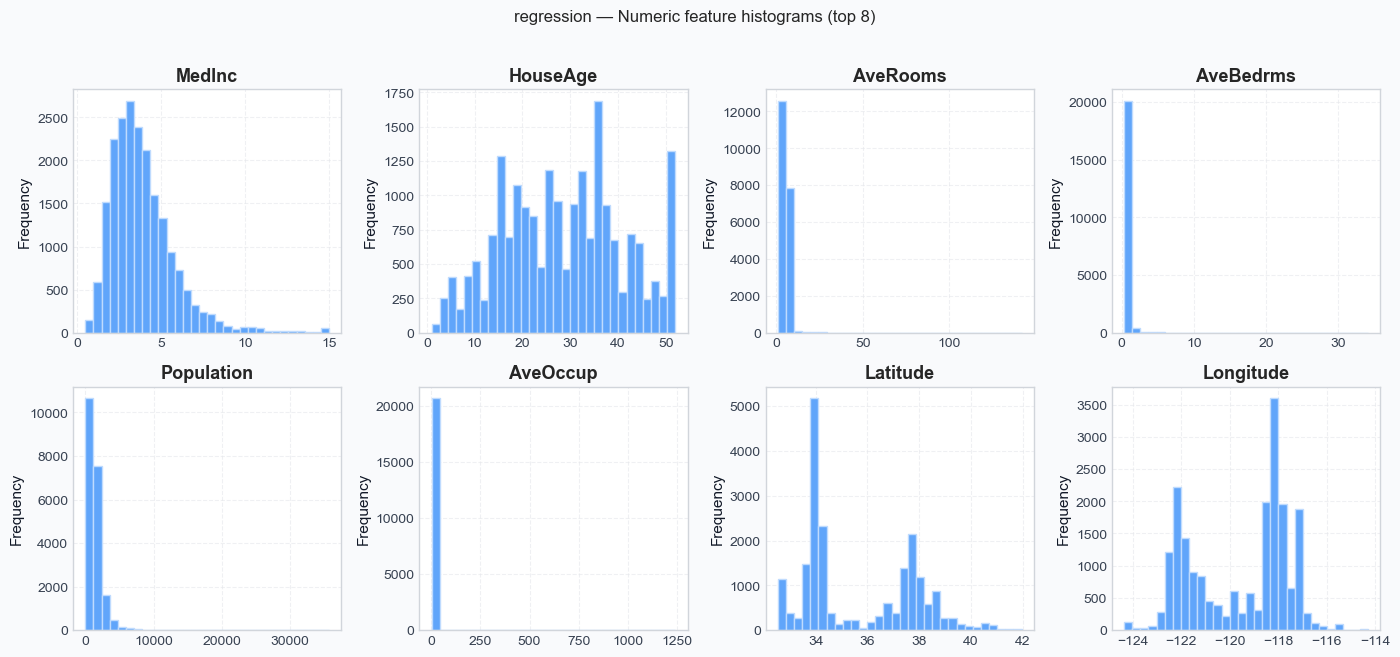

Saved: regression_04_numeric_hist_grid.png


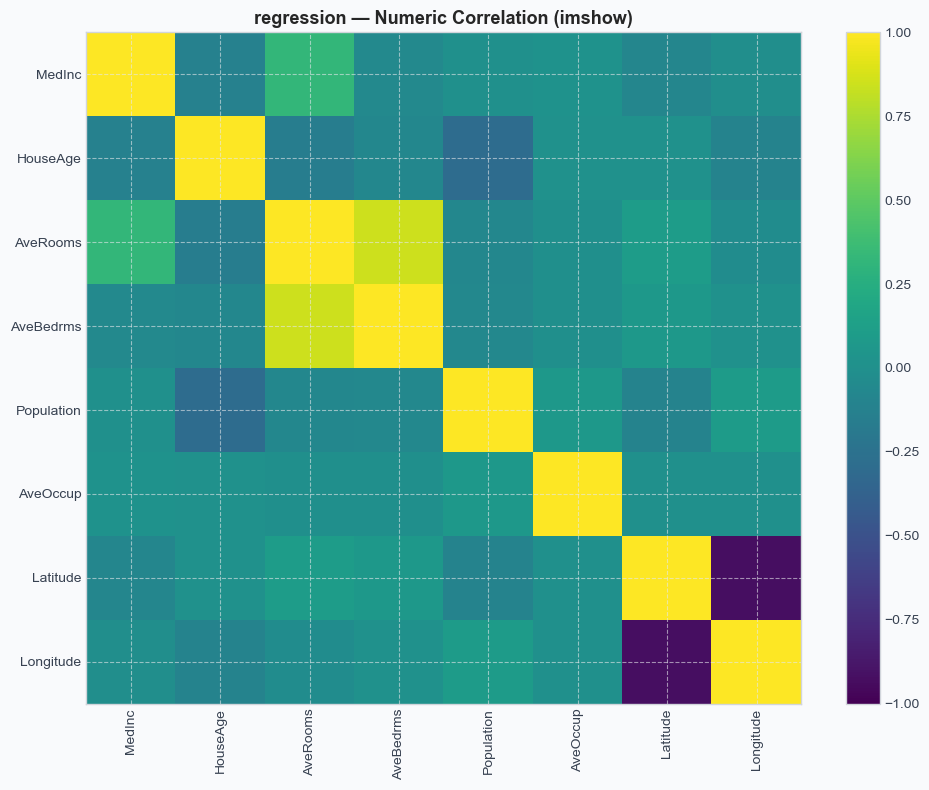

Saved: regression_05_numeric_correlation.png


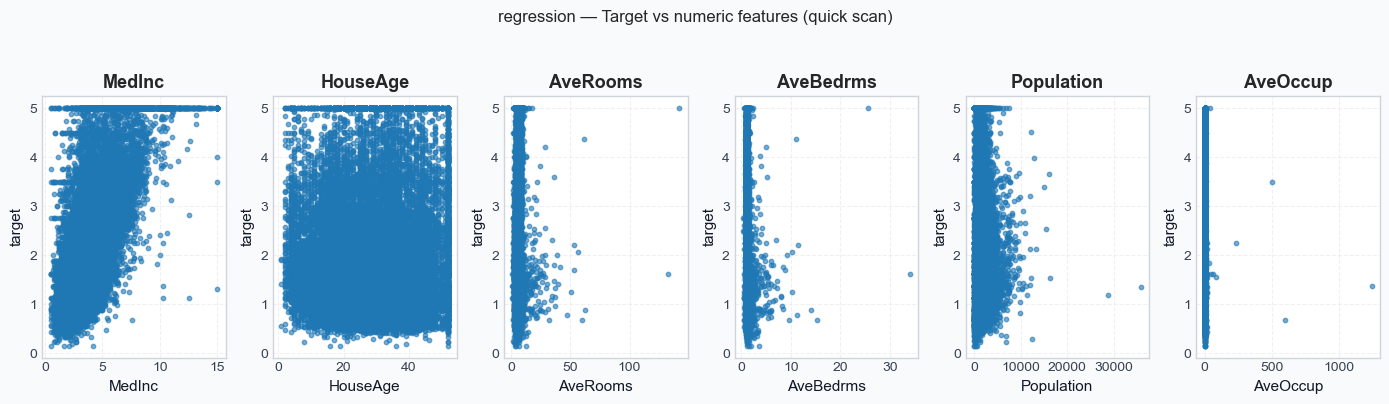

Saved: regression_06_target_vs_numeric_scatter_pack.png


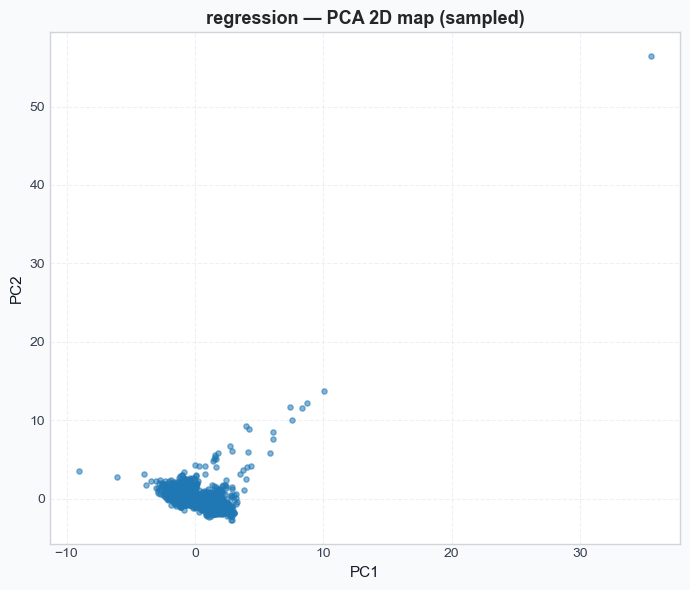

Saved: regression_08_pca_2d_map.png
Baseline RandomForestRegressor MAPE: 0.1895


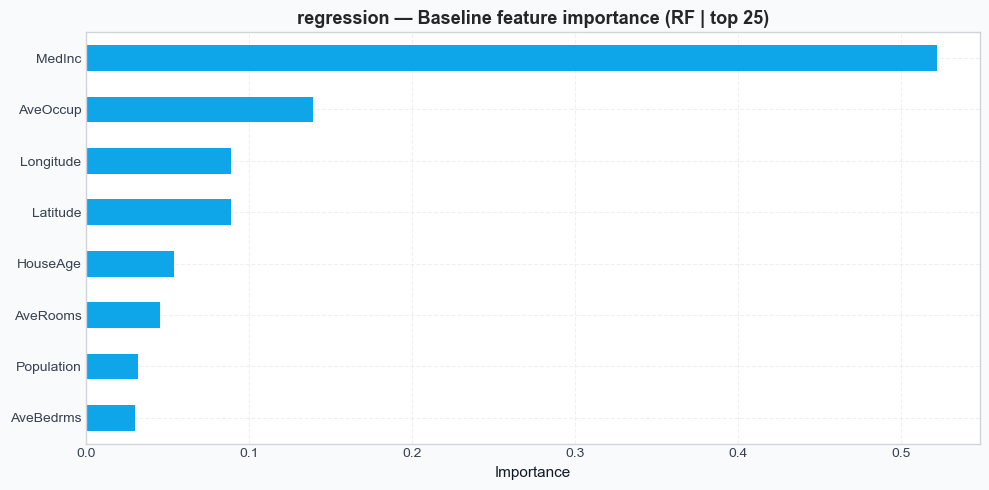

Saved: regression_09_baseline_feature_importance.png


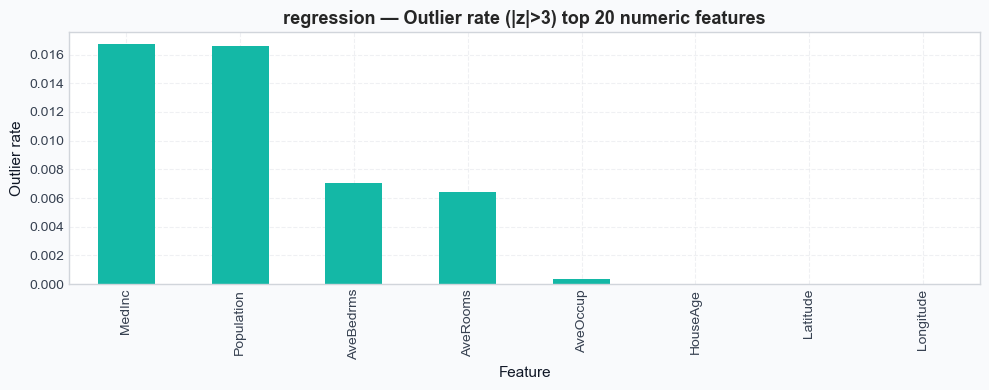

Saved: regression_10_outlier_rate.png
Unique EDA finished for regression. Plots saved in: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/reports/eda


ADVANCED EDA: classification
Target not numeric, skipping numeric advanced plots.

ADVANCED EDA: regression


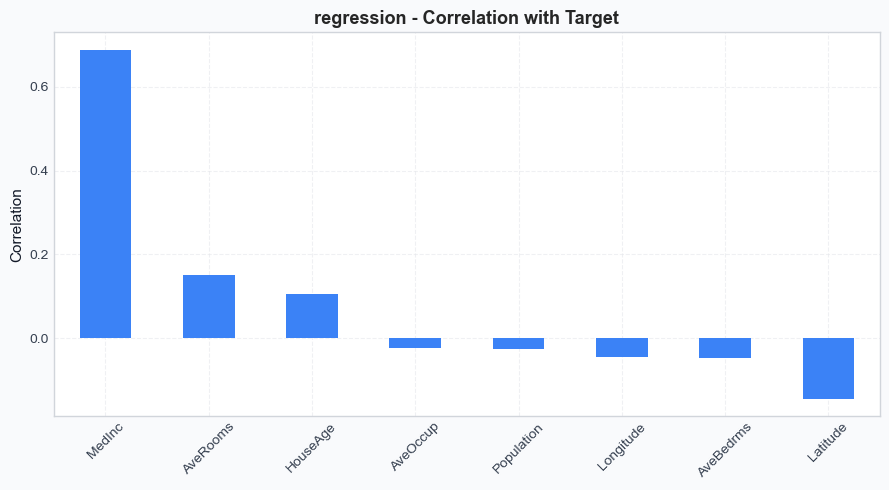

Saved: regression_A01_corr_with_target.png


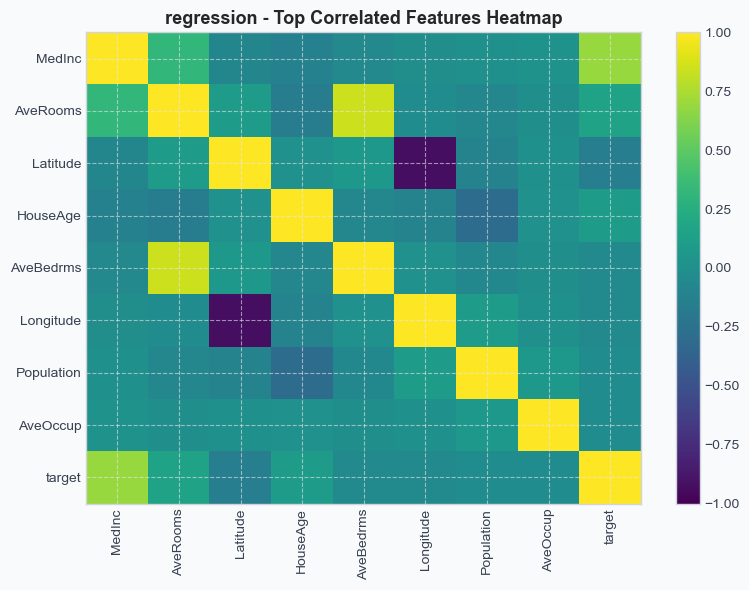

Saved: regression_A02_top_corr_heatmap.png


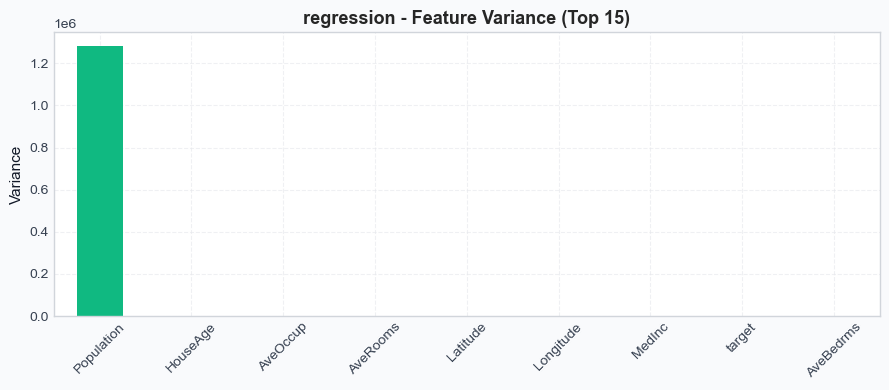

Saved: regression_A03_variance_top15.png


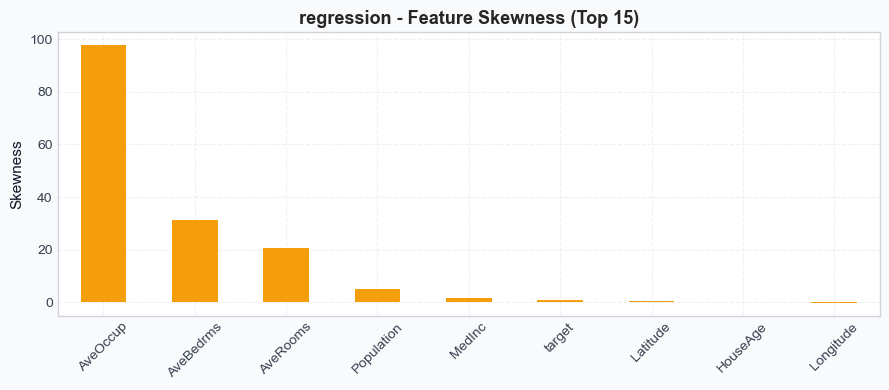

Saved: regression_A04_skew_top15.png


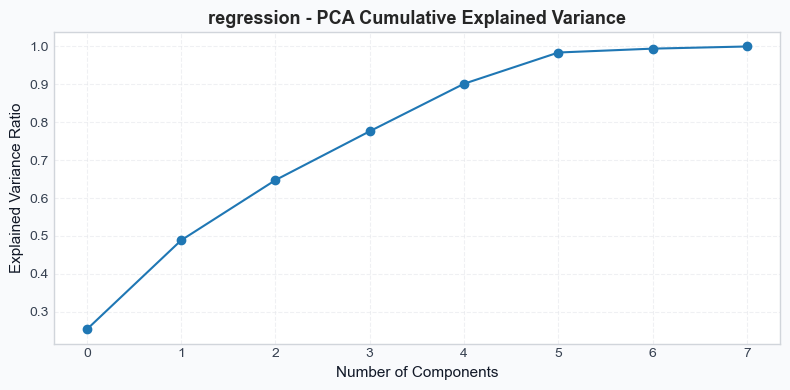

Saved: regression_A05_pca_explained_variance.png


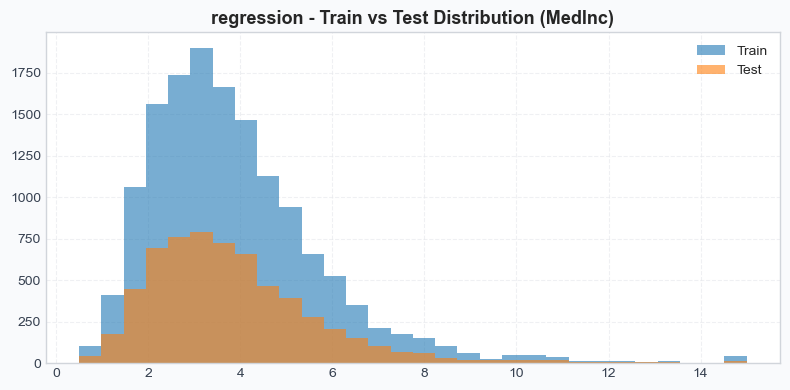

Saved: regression_A06_train_vs_test_MedInc.png
Advanced EDA completed for: regression
ALL DONE. Check plots in: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/reports/eda


In [9]:
# ===========================
# STEP 4 (MERGED): UNIQUE + ADVANCED EDA PACK (Client-Ready)
# - Professional theme
# - No emoji warnings
# - Saves ALL plots (unique + advanced) to reports/eda
# - Uses viridis for heatmaps (same as your screenshots)
# ===========================

import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(PROJECT_ROOT))

from src.config import REPORTS_DIR

EDA_DIR = REPORTS_DIR / "eda"
EDA_DIR.mkdir(parents=True, exist_ok=True)
print("EDA_DIR:", EDA_DIR)

# ---------------------------
# Professional plotting theme
# ---------------------------
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams.update({
    "figure.facecolor": "#f9fafc",
    "axes.facecolor": "#ffffff",
    "axes.edgecolor": "#d1d5db",
    "axes.labelcolor": "#111827",
    "axes.titleweight": "bold",
    "axes.titlesize": 13,
    "axes.labelsize": 11,
    "xtick.color": "#374151",
    "ytick.color": "#374151",
    "grid.color": "#e5e7eb",
    "grid.linestyle": "--",
    "grid.alpha": 0.6,
    "font.size": 10,
})
print("Professional plotting theme activated.")

# Heatmap colormap (MATCH your screenshot)
HEATMAP_CMAP = "viridis"

# ---------------------------
# Helpers
# ---------------------------
def save_show(filename: str):
    out = EDA_DIR / filename
    plt.tight_layout()
    plt.savefig(out, dpi=170, bbox_inches="tight")
    plt.show()
    plt.close()
    print("Saved:", out.name)

def split_cols(df, target_col="target"):
    X = df.drop(columns=[target_col], errors="ignore")
    num_cols = X.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = [c for c in X.columns if c not in num_cols]
    return X, num_cols, cat_cols

def preprocess_pipeline(num_cols, cat_cols):
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ])
    pre = ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols),
        ],
        remainder="drop"
    )
    return pre

def to_num(s: pd.Series):
    return pd.to_numeric(s, errors="coerce")

# ---------------------------
# UNIQUE EDA PACK (your old code)
# ---------------------------
def eda_unique(df: pd.DataFrame, name: str, task: str, target_col="target", top_k=12):
    print("\n" + "="*60)
    print(f"UNIQUE EDA PACK: {name} | task={task}")
    print("Shape:", df.shape)
    print("="*60)

    # ---------- 1) Missing values ----------
    miss = df.isna().sum().sort_values(ascending=False)
    miss = miss[miss > 0]
    plt.figure(figsize=(10,4))
    if len(miss) == 0:
        plt.text(0.5, 0.5, "No missing values - OK", ha="center", va="center", fontsize=12, color="#111827")
        plt.axis("off")
    else:
        miss.head(30).plot(kind="bar", color="#3b82f6")
        plt.title(f"{name} — Missing values (top 30 columns)")
        plt.xlabel("Column")
        plt.ylabel("Missing count")
    save_show(f"{name}_01_missing_values_bar.png")

    # ---------- 2) Dtype distribution ----------
    dtype_counts = df.dtypes.astype(str).value_counts()
    plt.figure(figsize=(7,4))
    dtype_counts.plot(kind="bar", color="#10b981")
    plt.title(f"{name} — Data types count")
    plt.xlabel("dtype")
    plt.ylabel("#columns")
    save_show(f"{name}_02_dtype_counts.png")

    # ---------- 3) Target distribution ----------
    plt.figure(figsize=(8,4))
    if task == "classification":
        df[target_col].value_counts().head(30).plot(kind="bar", color="#f59e0b")
        plt.title(f"{name} — Target distribution")
        plt.xlabel("Class")
        plt.ylabel("Count")
        save_show(f"{name}_03_target_distribution.png")
    else:
        to_num(df[target_col]).dropna().plot(kind="hist", bins=40, color="#6366f1", edgecolor="#c7d2fe")
        plt.title(f"{name} — Target histogram")
        plt.xlabel("Target")
        plt.ylabel("Frequency")
        save_show(f"{name}_03_target_histogram.png")

    _, num_cols, cat_cols = split_cols(df, target_col=target_col)
    print("Numeric cols:", len(num_cols), "| Categorical cols:", len(cat_cols))

    # ---------- 4) Numeric hist grid ----------
    if len(num_cols) > 0:
        use_cols = num_cols[:min(top_k, len(num_cols))]
        n = len(use_cols)
        ncols = 4
        nrows = int(np.ceil(n / ncols))
        plt.figure(figsize=(14, 3.2*nrows))
        for i, c in enumerate(use_cols, 1):
            plt.subplot(nrows, ncols, i)
            to_num(df[c]).dropna().plot(kind="hist", bins=30, color="#60a5fa", edgecolor="#bfdbfe")
            plt.title(c)
        plt.suptitle(f"{name} — Numeric feature histograms (top {len(use_cols)})", y=1.02)
        save_show(f"{name}_04_numeric_hist_grid.png")

    # ---------- 5) Correlation heatmap (viridis like your screenshot) ----------
    if len(num_cols) >= 2:
        corr = df[num_cols].corr(numeric_only=True)
        plt.figure(figsize=(10,8))
        im = plt.imshow(corr.values, aspect="auto", cmap=HEATMAP_CMAP, vmin=-1, vmax=1)
        plt.xticks(range(len(num_cols)), num_cols, rotation=90)
        plt.yticks(range(len(num_cols)), num_cols)
        plt.title(f"{name} — Numeric Correlation (imshow)")
        plt.colorbar(im)
        save_show(f"{name}_05_numeric_correlation.png")

    # ---------- 6) Target vs numeric scatter pack ----------
    if len(num_cols) > 0:
        use_cols = num_cols[:min(6, len(num_cols))]
        n = len(use_cols)
        plt.figure(figsize=(14, 3.8))
        for i, c in enumerate(use_cols, 1):
            plt.subplot(1, n, i)
            x = to_num(df[c])

            if task == "regression":
                y = to_num(df[target_col])
                plt.scatter(x, y, s=10, alpha=0.6)
                plt.xlabel(c)
                plt.ylabel("target")
            else:
                y_raw = df[target_col].astype("category").cat.codes.astype(float)
                y = y_raw + np.random.normal(0, 0.05, size=len(y_raw))
                plt.scatter(x, y, s=10, alpha=0.6)
                plt.xlabel(c)
                plt.ylabel("target (jittered)")
            plt.title(c)
        plt.suptitle(f"{name} — Target vs numeric features (quick scan)", y=1.05)
        save_show(f"{name}_06_target_vs_numeric_scatter_pack.png")

    # ---------- 7) Categorical cardinality ----------
    if len(cat_cols) > 0:
        card = pd.Series({c: df[c].nunique(dropna=True) for c in cat_cols}).sort_values(ascending=False)
        plt.figure(figsize=(10,4))
        card.head(30).plot(kind="bar", color="#ef4444")
        plt.title(f"{name} — Categorical cardinality (top 30)")
        plt.xlabel("Column")
        plt.ylabel("#unique values")
        save_show(f"{name}_07_categorical_cardinality.png")

    # ---------- 8) PCA 2D map ----------
    pre = preprocess_pipeline(num_cols, cat_cols)
    df_work = df.sample(n=min(4000, len(df)), random_state=42).copy()
    Xw = df_work.drop(columns=[target_col], errors="ignore")
    yw = df_work[target_col]

    try:
        Xmat = pre.fit_transform(Xw)
        pca = PCA(n_components=2, random_state=42)
        Z = pca.fit_transform(Xmat)

        plt.figure(figsize=(7,6))
        if task == "classification":
            classes = pd.Series(yw).astype("category")
            for cl in classes.cat.categories[:8]:
                mask = (classes == cl).values
                plt.scatter(Z[mask,0], Z[mask,1], s=14, alpha=0.55, label=str(cl))
            plt.legend(fontsize=8, loc="best")
            plt.title(f"{name} — PCA 2D map (sampled)")
        else:
            plt.scatter(Z[:,0], Z[:,1], s=14, alpha=0.55)
            plt.title(f"{name} — PCA 2D map (sampled)")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        save_show(f"{name}_08_pca_2d_map.png")
    except Exception as e:
        print("PCA plot skipped due to:", repr(e))

    # ---------- 9) Baseline explainability ----------
    try:
        if task == "classification":
            ycat = df[target_col].astype("category")
            y_codes = ycat.cat.codes

            X_train, X_test, y_train, y_test = train_test_split(
                df.drop(columns=[target_col]),
                y_codes,
                test_size=0.25,
                random_state=42,
                stratify=y_codes if ycat.nunique() <= 20 else None,
            )

            clf = Pipeline(steps=[
                ("pre", preprocess_pipeline(num_cols, cat_cols)),
                ("model", LogisticRegression(max_iter=1000))
            ])
            clf.fit(X_train, y_train)
            proba = clf.predict_proba(X_test)
            auc = roc_auc_score(y_test, proba, multi_class="ovr")
            print(f"Baseline LogisticRegression ROC-AUC (OVR): {auc:.4f}")

            model = clf.named_steps["model"]
            pre_t = clf.named_steps["pre"]

            feat_names = []
            if len(num_cols) > 0:
                feat_names += num_cols
            if len(cat_cols) > 0:
                ohe = pre_t.named_transformers_["cat"].named_steps["ohe"]
                feat_names += ohe.get_feature_names_out(cat_cols).tolist()

            coef = np.abs(model.coef_).mean(axis=0)
            top_idx = np.argsort(coef)[::-1][:25]
            plt.figure(figsize=(10,5))
            pd.Series(coef[top_idx], index=np.array(feat_names)[top_idx]).sort_values().plot(
                kind="barh", color="#8b5cf6"
            )
            plt.title(f"{name} — Baseline feature influence (LogReg | top 25)")
            plt.xlabel("Mean |coef| across classes")
            save_show(f"{name}_09_baseline_feature_influence.png")

        else:
            ynum = to_num(df[target_col])
            df2 = df.copy()
            df2[target_col] = ynum
            df2 = df2.dropna(subset=[target_col])

            X_train, X_test, y_train, y_test = train_test_split(
                df2.drop(columns=[target_col]),
                df2[target_col],
                test_size=0.25,
                random_state=42
            )

            reg = Pipeline(steps=[
                ("pre", preprocess_pipeline(num_cols, cat_cols)),
                ("model", RandomForestRegressor(
                    n_estimators=250,
                    random_state=42,
                    n_jobs=-1
                ))
            ])
            reg.fit(X_train, y_train)
            pred = reg.predict(X_test)
            mape = mean_absolute_percentage_error(y_test, pred)
            print(f"Baseline RandomForestRegressor MAPE: {mape:.4f}")

            model = reg.named_steps["model"]
            pre_t = reg.named_steps["pre"]

            feat_names = []
            if len(num_cols) > 0:
                feat_names += num_cols
            if len(cat_cols) > 0:
                ohe = pre_t.named_transformers_["cat"].named_steps["ohe"]
                feat_names += ohe.get_feature_names_out(cat_cols).tolist()

            imp = model.feature_importances_
            top_idx = np.argsort(imp)[::-1][:25]
            plt.figure(figsize=(10,5))
            pd.Series(imp[top_idx], index=np.array(feat_names)[top_idx]).sort_values().plot(
                kind="barh", color="#0ea5e9"
            )
            plt.title(f"{name} — Baseline feature importance (RF | top 25)")
            plt.xlabel("Importance")
            save_show(f"{name}_09_baseline_feature_importance.png")

    except Exception as e:
        print("Baseline explainability skipped due to:", repr(e))

    # ---------- 10) Outlier scan ----------
    if len(num_cols) > 0:
        df_num = df[num_cols].apply(to_num)
        z = (df_num - df_num.mean()) / (df_num.std(ddof=0) + 1e-9)
        outlier_rate = (np.abs(z) > 3).mean().sort_values(ascending=False).head(20)

        plt.figure(figsize=(10,4))
        outlier_rate.plot(kind="bar", color="#14b8a6")
        plt.title(f"{name} — Outlier rate (|z|>3) top 20 numeric features")
        plt.xlabel("Feature")
        plt.ylabel("Outlier rate")
        save_show(f"{name}_10_outlier_rate.png")

    print(f"Unique EDA finished for {name}. Plots saved in: {EDA_DIR}\n")


# ---------------------------
# ADVANCED EDA PACK (merged + now saves)
# ---------------------------
def advanced_eda(df: pd.DataFrame, name: str, target_col="target"):
    print("\n==============================")
    print("ADVANCED EDA:", name)
    print("==============================")

    num = df.select_dtypes(include=["number"]).copy()
    if target_col not in num.columns:
        print("Target not numeric, skipping numeric advanced plots.")
        return

    # 1) Correlation with target (sorted)
    corr_target = num.corr(numeric_only=True)[target_col].drop(target_col).sort_values(ascending=False)
    plt.figure(figsize=(9,5))
    corr_target.plot(kind="bar", color="#3b82f6")
    plt.title(f"{name} - Correlation with Target")
    plt.ylabel("Correlation")
    plt.xticks(rotation=45)
    save_show(f"{name}_A01_corr_with_target.png")

    # 2) Top 10 strongest correlations heatmap
    top_feats = corr_target.abs().sort_values(ascending=False).head(10).index.tolist()
    subset = num[top_feats + [target_col]].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    im = plt.imshow(subset.values, cmap=HEATMAP_CMAP, vmin=-1, vmax=1, aspect="auto")
    plt.xticks(range(len(subset.columns)), subset.columns, rotation=90)
    plt.yticks(range(len(subset.columns)), subset.columns)
    plt.title(f"{name} - Top Correlated Features Heatmap")
    plt.colorbar(im)
    save_show(f"{name}_A02_top_corr_heatmap.png")

    # 3) Feature Variance Ranking
    variance = num.var().sort_values(ascending=False).head(15)
    plt.figure(figsize=(9,4))
    variance.plot(kind="bar", color="#10b981")
    plt.title(f"{name} - Feature Variance (Top 15)")
    plt.ylabel("Variance")
    plt.xticks(rotation=45)
    save_show(f"{name}_A03_variance_top15.png")

    # 4) Skewness Detection
    skew = num.skew().sort_values(ascending=False).head(15)
    plt.figure(figsize=(9,4))
    skew.plot(kind="bar", color="#f59e0b")
    plt.title(f"{name} - Feature Skewness (Top 15)")
    plt.ylabel("Skewness")
    plt.xticks(rotation=45)
    save_show(f"{name}_A04_skew_top15.png")

    # 5) PCA Explained Variance Curve
    X_scaled = StandardScaler().fit_transform(num.drop(columns=[target_col]))
    pca = PCA()
    pca.fit(X_scaled)
    plt.figure(figsize=(8,4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
    plt.title(f"{name} - PCA Cumulative Explained Variance")
    plt.xlabel("Number of Components")
    plt.ylabel("Explained Variance Ratio")
    plt.grid(True)
    save_show(f"{name}_A05_pca_explained_variance.png")

    # 6) Train vs Test Distribution Preview
    X_train, X_test = train_test_split(num, test_size=0.3, random_state=42)
    feature = num.columns[0]
    plt.figure(figsize=(8,4))
    plt.hist(X_train[feature], bins=30, alpha=0.6, label="Train")
    plt.hist(X_test[feature], bins=30, alpha=0.6, label="Test")
    plt.title(f"{name} - Train vs Test Distribution ({feature})")
    plt.legend()
    save_show(f"{name}_A06_train_vs_test_{feature}.png")

    print("Advanced EDA completed for:", name)


# ===========================
# RUN FOR BOTH DATASETS
# ===========================
eda_unique(df_cls, name="classification", task="classification", target_col="target")
eda_unique(df_reg, name="regression", task="regression", target_col="target")

advanced_eda(df_cls, "classification", target_col="target")
advanced_eda(df_reg, "regression", target_col="target")

print("ALL DONE. Check plots in:", EDA_DIR)

In [10]:
!ls -lh reports/eda

total 4592
-rw-r--r--  1 aitullalabiblimon  staff    13K Feb 28 02:49 classification_01_missing_values_bar.png
-rw-r--r--  1 aitullalabiblimon  staff    32K Feb 28 02:49 classification_02_dtype_counts.png
-rw-r--r--  1 aitullalabiblimon  staff    38K Feb 28 02:49 classification_03_target_distribution.png
-rw-r--r--  1 aitullalabiblimon  staff   142K Feb 28 02:49 classification_04_numeric_hist_grid.png
-rw-r--r--  1 aitullalabiblimon  staff   125K Feb 28 02:49 classification_05_numeric_correlation.png
-rw-r--r--  1 aitullalabiblimon  staff   230K Feb 28 02:49 classification_06_target_vs_numeric_scatter_pack.png
-rw-r--r--  1 aitullalabiblimon  staff    83K Feb 27 01:45 classification_07_categorical_cardinality.png
-rw-r--r--  1 aitullalabiblimon  staff   168K Feb 28 02:49 classification_08_pca_2d_map.png
-rw-r--r--  1 aitullalabiblimon  staff    71K Feb 28 02:49 classification_10_outlier_rate.png
-rw-r--r--  1 aitullalabiblimon  staff    13K Feb 28 02:49 regression_01_missing_values_bar

### Feature Engineering + CV Training + Save Model (Production Template)

In [12]:
# ===========================
# STEP 5: FEATURE ENGINEERING + TRAINING PIPELINE + CV + SAVE MODEL
# - ColumnTransformer (num + cat)
# - Cross-validation
# - Metrics: F1, ROC-AUC, MAPE
# - Saves model to models/
# - Plug & Play predict()
# ===========================

import sys
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, KFold, cross_validate, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    f1_score, roc_auc_score,
    mean_absolute_percentage_error
)

import joblib

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(PROJECT_ROOT))

from src.config import MODELS_DIR

MODELS_DIR.mkdir(parents=True, exist_ok=True)
print("MODELS_DIR:", MODELS_DIR)

# ---------------------------
# Helpers
# ---------------------------
def split_cols(df, target_col="target"):
    X = df.drop(columns=[target_col], errors="ignore")
    num_cols = X.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = [c for c in X.columns if c not in num_cols]
    return X, num_cols, cat_cols

def build_preprocessor(num_cols, cat_cols):
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    pre = ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("cat", cat_pipe, cat_cols)
        ],
        remainder="drop"
    )
    return pre

# Custom scoring for regression (MAPE) for cross_validate
def mape_scorer(estimator, X, y):
    pred = estimator.predict(X)
    # avoid division by zero issues
    y_safe = np.where(np.abs(y) < 1e-9, 1e-9, y)
    return -mean_absolute_percentage_error(y_safe, pred)  # negative because sklearn expects higher = better

# ---------------------------
# A) CLASSIFICATION PIPELINE (F1 + ROC-AUC)
# ---------------------------
def train_classification(df, target_col="target", model_name="clf_pipeline"):
    X, num_cols, cat_cols = split_cols(df, target_col)
    y = df[target_col].astype("category")
    y_codes = y.cat.codes  # numeric labels for sklearn

    pre = build_preprocessor(num_cols, cat_cols)

    clf = Pipeline(steps=[
        ("pre", pre),
        ("model", LogisticRegression(max_iter=2000))
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {
        "f1_macro": "f1_macro",
        "roc_auc_ovr": "roc_auc_ovr"
    }

    print("\n=== CV: Classification ===")
    cv_res = cross_validate(
        clf, X, y_codes,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )

    print("F1_macro (mean):", round(cv_res["test_f1_macro"].mean(), 4))
    print("ROC-AUC OVR (mean):", round(cv_res["test_roc_auc_ovr"].mean(), 4))

    # Fit final model on full data
    clf.fit(X, y_codes)

    # Save model + label mapping
    out_model = MODELS_DIR / f"{model_name}.joblib"
    joblib.dump({"pipeline": clf, "class_names": y.cat.categories.tolist()}, out_model)
    print("Saved:", out_model)

    return clf

# ---------------------------
# B) REGRESSION PIPELINE (MAPE)
# ---------------------------
def train_regression(df, target_col="target", model_name="reg_pipeline"):
    X, num_cols, cat_cols = split_cols(df, target_col)
    y = pd.to_numeric(df[target_col], errors="coerce")
    df2 = df.copy()
    df2[target_col] = y
    df2 = df2.dropna(subset=[target_col])

    X = df2.drop(columns=[target_col])
    y = df2[target_col].values

    pre = build_preprocessor(num_cols, cat_cols)

    reg = Pipeline(steps=[
        ("pre", pre),
        ("model", RandomForestRegressor(
            n_estimators=300,
            random_state=42,
            n_jobs=-1
        ))
    ])

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    print("\n=== CV: Regression ===")
    cv_res = cross_validate(
        reg, X, y,
        cv=cv,
        scoring={"neg_mape": mape_scorer},
        return_train_score=False
    )

    mape_mean = -cv_res["test_neg_mape"].mean()
    print("MAPE (mean):", round(mape_mean, 4))

    # Fit final model on full data
    reg.fit(X, y)

    # Save model
    out_model = MODELS_DIR / f"{model_name}.joblib"
    joblib.dump({"pipeline": reg}, out_model)
    print("Saved:", out_model)

    return reg

# ---------------------------
# Prediction functions (plug & play)
# ---------------------------
def load_model(model_path: Path):
    obj = joblib.load(model_path)
    return obj

def predict_classification(model_obj, X_new: pd.DataFrame):
    pipe = model_obj["pipeline"]
    class_names = model_obj["class_names"]
    proba = pipe.predict_proba(X_new)
    pred_idx = np.argmax(proba, axis=1)
    pred_label = [class_names[i] for i in pred_idx]
    return pd.DataFrame({
        "pred_label": pred_label,
        "pred_proba_max": proba.max(axis=1)
    })

def predict_regression(model_obj, X_new: pd.DataFrame):
    pipe = model_obj["pipeline"]
    pred = pipe.predict(X_new)
    return pd.DataFrame({"prediction": pred})

# ===========================
# RUN TRAINING FOR BOTH
# ===========================
clf_pipe = train_classification(df_cls, target_col="target", model_name="classification_pipeline")
reg_pipe = train_regression(df_reg, target_col="target", model_name="regression_pipeline")

print("\nSTEP 5 DONE Models saved in:", MODELS_DIR)

MODELS_DIR: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/models

=== CV: Classification ===
F1_macro (mean): 0.6766
ROC-AUC OVR (mean): 0.7862
Saved: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/models/classification_pipeline.joblib

=== CV: Regression ===
MAPE (mean): 0.1833
Saved: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/models/regression_pipeline.joblib

STEP 5 DONE Models saved in: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/models


In [13]:
# ===========================
# STEP 6: PRODUCTION INFERENCE MODULE
# - Load saved model
# - Predict on new data
# - Save predictions to CSV
# - Clean reusable functions
# ===========================

import sys
from pathlib import Path
import pandas as pd
import joblib
import numpy as np

# ---------------------------
# Paths
# ---------------------------
PROJECT_ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(PROJECT_ROOT))

from src.config import MODELS_DIR, DATA_DIR

PRED_DIR = PROJECT_ROOT / "predictions"
PRED_DIR.mkdir(parents=True, exist_ok=True)

print("Prediction folder:", PRED_DIR)

# ---------------------------
# Load Model
# ---------------------------
def load_model(model_name: str):
    model_path = MODELS_DIR / f"{model_name}.joblib"
    obj = joblib.load(model_path)
    print("Loaded model:", model_path.name)
    return obj

# ---------------------------
# Classification Prediction
# ---------------------------
def run_classification_inference(input_df: pd.DataFrame,
                                 model_name="classification_pipeline",
                                 save_name="classification_predictions.csv"):

    model_obj = load_model(model_name)
    pipe = model_obj["pipeline"]
    class_names = model_obj["class_names"]

    proba = pipe.predict_proba(input_df)
    pred_idx = np.argmax(proba, axis=1)
    pred_label = [class_names[i] for i in pred_idx]

    result = input_df.copy()
    result["pred_label"] = pred_label
    result["pred_confidence"] = proba.max(axis=1)

    out_path = PRED_DIR / save_name
    result.to_csv(out_path, index=False)

    print("Saved predictions:", out_path)
    return result

# ---------------------------
# Regression Prediction
# ---------------------------
def run_regression_inference(input_df: pd.DataFrame,
                             model_name="regression_pipeline",
                             save_name="regression_predictions.csv"):

    model_obj = load_model(model_name)
    pipe = model_obj["pipeline"]

    preds = pipe.predict(input_df)

    result = input_df.copy()
    result["prediction"] = preds

    out_path = PRED_DIR / save_name
    result.to_csv(out_path, index=False)

    print("Saved predictions:", out_path)
    return result

# ===========================
# DEMO TEST (simulate client data)
# ===========================

# Take small sample from original data
sample_cls = df_cls.drop(columns=["target"]).sample(10, random_state=42)
sample_reg = df_reg.drop(columns=["target"]).sample(10, random_state=42)

cls_predictions = run_classification_inference(sample_cls)
reg_predictions = run_regression_inference(sample_reg)

print("\nSTEP 6 COMPLETE Inference working.")

Prediction folder: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/predictions
Loaded model: classification_pipeline.joblib
Saved predictions: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/predictions/classification_predictions.csv
Loaded model: regression_pipeline.joblib
Saved predictions: /Users/aitullalabiblimon/Documents/Nexora Labs/end-to-end-ml-production-system/predictions/regression_predictions.csv

STEP 6 COMPLETE Inference working.


In [14]:
from pathlib import Path

project_path = Path.cwd()

# -------------------------
# Create/overwrite .gitignore
# -------------------------
gitignore_path = project_path / ".gitignore"
gitignore_content = """__pycache__/
*.pyc
*.pyo
*.pyd
.DS_Store
.ipynb_checkpoints/
.env
.venv/
venv/
"""

gitignore_path.write_text(gitignore_content)

# -------------------------
# Create/overwrite README.md (SAFE VERSION)
# -------------------------
readme_path = project_path / "README.md"

readme_content = (
"# End-to-End ML Production Pipeline (Client-Ready Template)\n\n"
"## Overview\n\n"
"This project demonstrates a fully production-ready Machine Learning pipeline including:\n\n"
"- Data ingestion\n"
"- Advanced EDA\n"
"- Feature engineering (ColumnTransformer)\n"
"- Cross-validation\n"
"- Metrics (F1, ROC-AUC, MAPE)\n"
"- Model saving (joblib)\n"
"- Inference module\n"
"- Batch prediction export (CSV)\n\n"
"---\n\n"
"## Architecture\n\n"
"Raw Data -> EDA -> Preprocessing -> Model Training -> Cross Validation -> "
"Model Saving -> Inference -> Prediction Export\n\n"
"---\n\n"
"## How to Run (Local)\n\n"
"1) Install dependencies:\n\n"
"pip install -r requirements.txt\n\n"
"2) Start Jupyter:\n\n"
"jupyter notebook\n\n"
"3) Run the notebook in notebooks/\n\n"
"Models saved in models/\n"
"Predictions saved in predictions/\n\n"
"---\n\n"
"## Run with Docker\n\n"
"Build and start container:\n\n"
"docker compose up --build\n\n"
"Then open in browser:\n\n"
"http://localhost:8888\n\n"
"---\n\n"
"## CLI Inference (No Notebook Required)\n\n"
"Classification example:\n\n"
"python src/predict_cli.py --task classification "
"--model classification_pipeline "
"--input_csv data/sample_cls.csv "
"--output_csv predictions/cls_out.csv\n\n"
"Regression example:\n\n"
"python src/predict_cli.py --task regression "
"--model regression_pipeline "
"--input_csv data/sample_reg.csv "
"--output_csv predictions/reg_out.csv\n\n"
"---\n\n"
"Use cases: fraud detection, risk scoring, forecasting, research, analytics.\n"
)

readme_path.write_text(readme_content)

print("README.md and .gitignore updated successfully!")

README.md and .gitignore updated successfully!


### Create Docker + CLI files

In [16]:
from pathlib import Path

ROOT = Path.cwd()
SRC = ROOT / "src"
DATA = ROOT / "data"
PRED = ROOT / "predictions"

SRC.mkdir(parents=True, exist_ok=True)
DATA.mkdir(parents=True, exist_ok=True)
PRED.mkdir(parents=True, exist_ok=True)

# -------------------------
# Dockerfile
# -------------------------
dockerfile = """FROM python:3.11-slim

WORKDIR /app

RUN apt-get update && apt-get install -y --no-install-recommends \\
    build-essential \\
 && rm -rf /var/lib/apt/lists/*

COPY requirements.txt /app/requirements.txt
RUN pip install --no-cache-dir -r requirements.txt
RUN pip install --no-cache-dir jupyter

COPY . /app

EXPOSE 8888

CMD ["jupyter", "notebook", "--ip=0.0.0.0", "--port=8888", "--no-browser", "--allow-root", "--NotebookApp.token="]
"""
(ROOT / "Dockerfile").write_text(dockerfile)

# -------------------------
# docker-compose.yml
# -------------------------
compose = """services:
  ml-pipeline:
    build: .
    container_name: end_to_end_ml_pipeline
    ports:
      - "8888:8888"
    volumes:
      - .:/app
    working_dir: /app
"""
(ROOT / "docker-compose.yml").write_text(compose)

# -------------------------
# src/predict_cli.py  (Client-ready CLI inference)
# -------------------------
predict_cli = """import argparse
from pathlib import Path
import joblib
import pandas as pd
import numpy as np

def load_model(models_dir: Path, name: str):
    path = models_dir / f"{name}.joblib"
    obj = joblib.load(path)
    print(f"Loaded model: {path}")
    return obj

def predict_classification(model_obj, X: pd.DataFrame) -> pd.DataFrame:
    pipe = model_obj["pipeline"]
    class_names = model_obj["class_names"]
    proba = pipe.predict_proba(X)
    pred_idx = np.argmax(proba, axis=1)
    pred_label = [class_names[i] for i in pred_idx]
    out = X.copy()
    out["pred_label"] = pred_label
    out["pred_confidence"] = proba.max(axis=1)
    return out

def predict_regression(model_obj, X: pd.DataFrame) -> pd.DataFrame:
    pipe = model_obj["pipeline"]
    pred = pipe.predict(X)
    out = X.copy()
    out["prediction"] = pred
    return out

def main():
    p = argparse.ArgumentParser(description="Client-ready inference CLI")
    p.add_argument("--task", choices=["classification", "regression"], required=True)
    p.add_argument("--model", required=True, help="Model name without .joblib (e.g. classification_pipeline)")
    p.add_argument("--input_csv", required=True)
    p.add_argument("--output_csv", required=True)
    p.add_argument("--models_dir", default="models")
    args = p.parse_args()

    models_dir = Path(args.models_dir)
    df = pd.read_csv(args.input_csv)

    model_obj = load_model(models_dir, args.model)

    if args.task == "classification":
        preds = predict_classification(model_obj, df)
    else:
        preds = predict_regression(model_obj, df)

    out_path = Path(args.output_csv)
    out_path.parent.mkdir(parents=True, exist_ok=True)
    preds.to_csv(out_path, index=False)
    print(f"Saved predictions: {out_path}")

if __name__ == "__main__":
    main()
"""
(SRC / "predict_cli.py").write_text(predict_cli)

# -------------------------
# Create sample input CSVs (from your existing dfs)
# These let clients run CLI quickly.
# -------------------------
try:
    # expects df_cls, df_reg exist in notebook
    sample_cls = df_cls.drop(columns=["target"]).sample(20, random_state=42)
    sample_reg = df_reg.drop(columns=["target"]).sample(20, random_state=42)

    (DATA / "sample_cls.csv").write_text(sample_cls.to_csv(index=False))
    (DATA / "sample_reg.csv").write_text(sample_reg.to_csv(index=False))
    print("Created data/sample_cls.csv and data/sample_reg.csv")
except Exception as e:
    print("️Could not create sample CSVs (df_cls/df_reg not found in this notebook session).")
    print("Error:", repr(e))

print("Step 8 created:")
print("- Dockerfile")
print("- docker-compose.yml")
print("- src/predict_cli.py")
print("- data/sample_cls.csv (if available)")
print("- data/sample_reg.csv (if available)")

Created data/sample_cls.csv and data/sample_reg.csv
Step 8 created:
- Dockerfile
- docker-compose.yml
- src/predict_cli.py
- data/sample_cls.csv (if available)
- data/sample_reg.csv (if available)


### compress the saved models

In [18]:
from pathlib import Path
import joblib

models_dir = Path.cwd() / "models"

# compress classification
clf_in = models_dir / "classification_pipeline.joblib"
if clf_in.exists():
    clf_obj = joblib.load(clf_in)
    joblib.dump(clf_obj, models_dir / "classification_pipeline_compressed.joblib", compress=3)
    print("Saved: classification_pipeline_compressed.joblib")

# compress regression
reg_in = models_dir / "regression_pipeline.joblib"
if reg_in.exists():
    reg_obj = joblib.load(reg_in)
    joblib.dump(reg_obj, models_dir / "regression_pipeline_compressed.joblib", compress=3)
    print("Saved: regression_pipeline_compressed.joblib")

print("Done. Now check file sizes in models/")

Saved: classification_pipeline_compressed.joblib
Saved: regression_pipeline_compressed.joblib
Done. Now check file sizes in models/


### FINAL DELIVERY PACK

In [20]:
import shutil
from pathlib import Path
import zipfile
from datetime import datetime

ROOT = Path.cwd()
RELEASE_DIR = ROOT / "release_package"
RELEASE_DIR.mkdir(exist_ok=True)

# -----------------------------
# Create DELIVERY_CHECKLIST.md
# -----------------------------
checklist_content = f"""# Client Delivery Checklist

Project: End-to-End ML Production Pipeline
Date: {datetime.now().strftime("%Y-%m-%d")}

------------------------------------------

PROJECT STRUCTURE INCLUDED:

- data/
- models/ (compressed models only)
- predictions/
- reports/
- src/
- Dockerfile
- docker-compose.yml
- requirements.txt
- README.md
- run_local.sh

------------------------------------------

HOW TO RUN LOCALLY:

1) Install dependencies:
   pip install -r requirements.txt

2) Start Jupyter:
   jupyter notebook

------------------------------------------

HOW TO RUN WITH DOCKER:

docker compose up --build

Then open:
http://localhost:8888

------------------------------------------

CLI INFERENCE EXAMPLE:

Classification:
python src/predict_cli.py --task classification --model classification_pipeline_compressed --input_csv data/sample_cls.csv --output_csv predictions/cls_out.csv

Regression:
python src/predict_cli.py --task regression --model regression_pipeline_compressed --input_csv data/sample_reg.csv --output_csv predictions/reg_out.csv

------------------------------------------

DELIVERY NOTES:

- Models are compressed for efficient transfer.
- EDA reports are pre-generated in reports/eda.
- Prediction outputs are saved in predictions/.
- Project is fully production-structured.

------------------------------------------

Delivered by: Nexora Labs
"""

(ROOT / "DELIVERY_CHECKLIST.md").write_text(checklist_content)

print("DELIVERY_CHECKLIST.md created")

# -----------------------------
# Clean release copy
# -----------------------------
exclude_names = {
    "__pycache__",
    ".DS_Store",
    ".ipynb_checkpoints",
    "regression_pipeline.joblib"  # exclude big model if still exists
}

def copy_filtered(src, dst):
    if src.name in exclude_names:
        return
    if src.is_dir():
        dst.mkdir(exist_ok=True)
        for item in src.iterdir():
            copy_filtered(item, dst / item.name)
    else:
        if src.name.endswith(".pyc"):
            return
        shutil.copy2(src, dst)

for item in ROOT.iterdir():
    if item.name == "release_package":
        continue
    copy_filtered(item, RELEASE_DIR / item.name)

print("Clean release folder created")

# -----------------------------
# Create ZIP
# -----------------------------
zip_path = ROOT / "end_to_end_ml_production_release.zip"

with zipfile.ZipFile(zip_path, "w", zipfile.ZIP_DEFLATED) as zipf:
    for file in RELEASE_DIR.rglob("*"):
        zipf.write(file, file.relative_to(RELEASE_DIR))

print("ZIP created:", zip_path.name)

print("\n STEP 9 COMPLETE.")
print("You can now:")
print("1) Upload ZIP to client")
print("2) Push project to GitHub")

DELIVERY_CHECKLIST.md created
Clean release folder created
ZIP created: end_to_end_ml_production_release.zip

 STEP 9 COMPLETE.
You can now:
1) Upload ZIP to client
2) Push project to GitHub


In [35]:
from pathlib import Path

root = Path.cwd()

# MIT License
(root / "LICENSE").write_text("""MIT License

Copyright (c) 2026 Nexora Labs

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
""")

# Improve README (simple + safe, no backticks)
readme = root / "README.md"
txt = readme.read_text()

header = (
"# End-to-End ML Production Pipeline (Client-Ready Template)\n\n"
"Badges: Python | scikit-learn | Docker | CLI Inference\n\n"
"This repo is a reusable ML production template (classification + regression) with:\n"
"- EDA reports\n- preprocessing pipelines\n- cross-validation\n- metrics\n- model saving\n- batch inference (CLI)\n- optional Docker run\n\n"
)
# Replace first line if it starts with '#'
lines = txt.splitlines()
if lines and lines[0].startswith("#"):
    # keep the rest
    txt2 = "\n".join(lines[1:]).lstrip()
    readme.write_text(header + txt2)
else:
    readme.write_text(header + txt)

print("LICENSE created + README upgraded")

LICENSE created + README upgraded
